In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm

from sklearn import datasets
from pandas.core import datetools

import matplotlib.pyplot as plt
%matplotlib inline

/Users/bogdanmursa/.virtualenvs/statistical-tests/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [4]:
boston_dataset = datasets.load_boston()

print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
target = pd.DataFrame(boston_dataset.target, columns=["MEDV"])

df_full = pd.DataFrame(data=np.c_[boston_dataset['data'], boston_dataset['target']],
                     columns=boston_dataset['feature_names'].tolist()  + ['MEDV'])

var = "AGE"

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
x_axis = df[var]
y_axis = target["MEDV"]

model = sm.OLS(y_axis, x_axis).fit()
predictions = model.predict(x_axis)

Regression line formula
    __Y = b0 + b1X1__ <br>
        b0 - __slope__<br>
        b1 - __Y intercept__<br>
<br>
For multiple variables:<br>
    __Y = b0 + b1X1 + b2X2 ... + bnXn__

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     915.1
Date:                Wed, 31 Jan 2018   Prob (F-statistic):          1.85e-115
Time:                        14:34:39   Log-Likelihood:                -2071.5
No. Observations:                 506   AIC:                             4145.
Df Residuals:                     505   BIC:                             4149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.2636      0.009     30.250      0.0

### __UPPER LEFT TABLE__ - general information of the model<br>
__Element Description__ <br>
__Dep. Variable__	Which variable is the response in the model<br>
__Model__	What model you are using in the fit<br>
__Method__	How the parameters of the model were calculated<br>
__No. Observations__	The number of observations (examples)<br>
__DF Residuals__	Degrees of freedom of the residuals. Number of observations – number of parameters<br>
__DF Model__	Number of parameters in the model (not including the constant term if present)<br>
<br>
### __UPPER RIGHT TABLE - shows the goodness of fit__<br>
__Element	Description__ <br>
__R-squared__	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points<br>
__Adj. R-squared__	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals<br>
__F-statistic__	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals<br>
__Prob (F-statistic)__	The probability that you would get the above statistic, given the null hypothesis that they are unrelated<br>
__Log-likelihood__	The log of the likelihood function.<br>
__AIC__	The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.<br>
__BIC__	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.<br>
<br>
### __The second table reports for each of the coefficients__ <br>
__Description__<br>
The name of the term in the model<br>
__coef__	The estimated value of the coefficient<br>
__std err__	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.<br>
__t__	The t-statistic value. This is a measure of how statistically significant the coefficient is.<br>
__P > |t|__	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence <br>level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.<br>
__[95.0% Conf. Interval]__ The lower and upper values of the 95% confidence interval<br>
<br>
### __Finally, there are several statistical tests to assess the distribution of the residuals__ <br>
__Validations__<br>
Element	Description<br>
__Skewness__	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).<br>
__Kurtosis__	A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).<br>
__Omnibus__	D’Angostino’s test. It provides a combined statistical test for the presence of skewness and kurtosis.<br>
__Prob(Omnibus)__	The above statistic turned into a probability<br>
__Jarque-Bera__	A different test of the skewness and kurtosis<br>
__Prob (JB)__	The above statistic turned into a probability<br>
__Durbin-Watson__	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis<br>
__Cond. No__	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).<br>

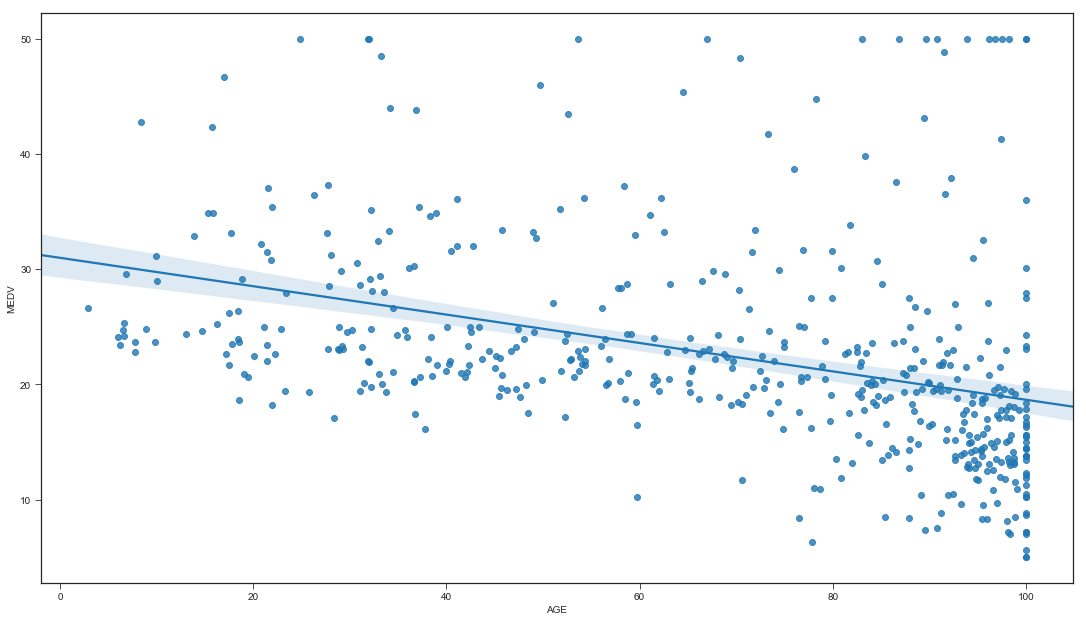

In [10]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

sns.regplot(x=var, y="MEDV", data=df_full, ax=ax, ci=95);